In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



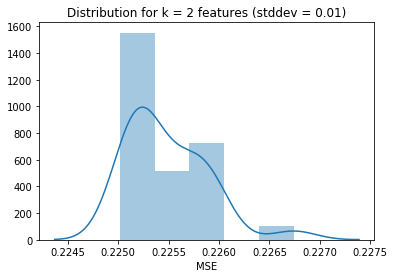

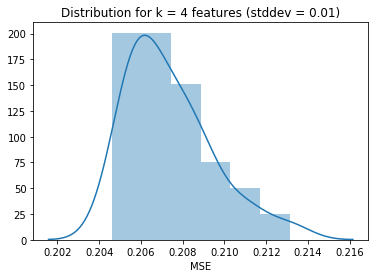

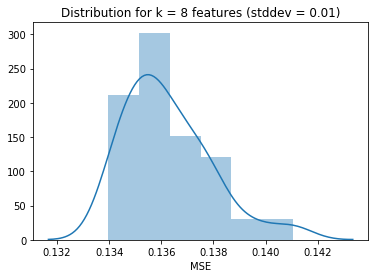

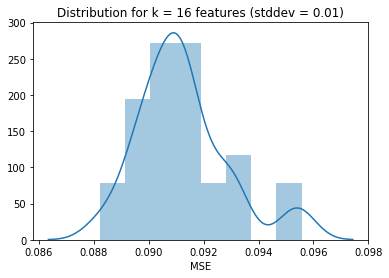

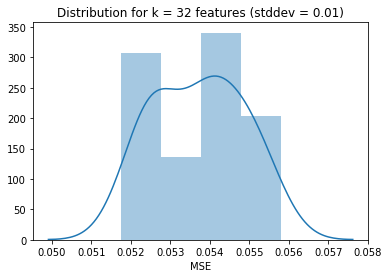

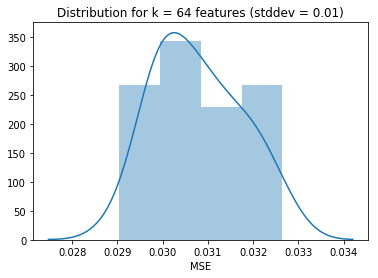

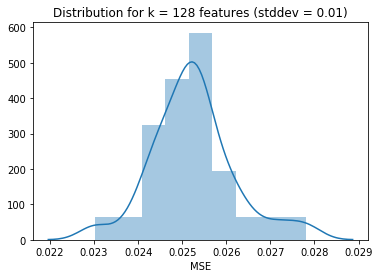

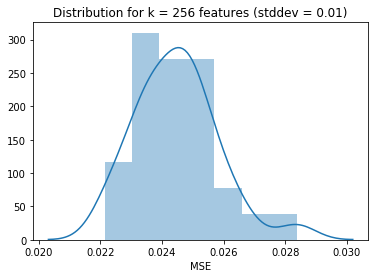

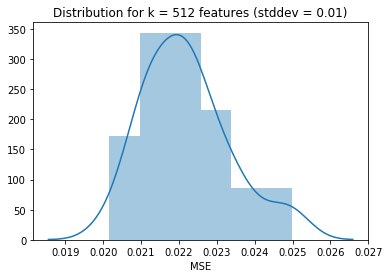

In [52]:
stddevs = []
means = []
x = [2, 4, 8, 16, 32, 64, 128, 256, 512]
results = []
for i in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
# i = 512
    result = pd.read_csv("./Results/CAE/Damavand/Not Noised/encoded_results_0.01_{0}.csv".format(i), header=None)
    sns.distplot(result)
    plt.xlabel("MSE")
    plt.title("Distribution for k = {0} features (stddev = 0.01)".format(i))
#     plt.savefig("./Results/CAE/Plots/dist_{0}_{1}.png".format(i, 0.01))
    results.append(result.as_matrix())
    stddevs.append(float(result.std()))
    means.append(float(result.mean()))
    plt.show()
#     plt.close()

group_labels = [str(x_i) for x_i in x]


In [54]:
for i in range(len(results)):
    results[i] = results[i][~np.isnan(results[i])]

In [55]:
fig = ff.create_distplot(results, group_labels, bin_size=.2)
py.iplot(fig, filename='Distplot_all')

In [56]:
data = [
    go.Scatter(
        x=x,
        y=means,
        error_y=dict(
            type='data',
            symmetric=False,
            array=stddevs,
            arrayminus=stddevs
        )
    )
]

layout= go.Layout(
    xaxis= dict(
        title= '# of selected features',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'MSE +/- stddev',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig)



In [76]:
import shap
code_layer = pd.read_csv("./Results/CAE/old/encoded_scae_dropout.csv", header=None)
shap_values = pd.read_csv('./dec_shap_values.csv', header=None)
# shap.summary_plot(shap_values.as_matrix())